Cross Product Approach

In [1]:
import serial
import serial.tools
import serial.tools.list_ports

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from tqdm import tqdm

# Serial Setup

In [2]:
ports = serial.tools.list_ports.comports()
for port in ports:
    print(f"Port: '{port.device}' - {port.description}")

Port: '/dev/cu.debug-console' - n/a
Port: '/dev/cu.ZihuiAndysPowerbeatsPro' - n/a
Port: '/dev/cu.Bluetooth-Incoming-Port' - n/a
Port: '/dev/cu.usbmodem21101' - IOUSBHostDevice


In [3]:
ser = serial.Serial('/dev/cu.usbmodem21101', 9600, timeout=None)

In [4]:
def get_accelerometer_data():
    ser.reset_input_buffer()
    while True:
        try:
            data = ser.readline().decode('utf-8').strip()
            data_splitted = list(map(int, data.split(',')))
            
            if len(data_splitted) == 3:
                break
        except:
            pass
    return np.array(data_splitted)

# Vector Operations

In [5]:
def get_magnitude(vec):
    return np.sqrt(np.dot(vec, vec))

In [6]:
def get_unit_vector(vec):
    return vec / get_magnitude(vec)

In [7]:
def get_angle_btwn_vecs(vec1, vec2):
    vec1_h = get_unit_vector(vec1)
    vec2_h = get_unit_vector(vec2)
    
    return np.arccos(np.dot(vec1_h, vec2_h))

def to_degree(radian):
    return 180 * radian / np.pi

In [8]:
def projection(from_, to):
    to_h = get_unit_vector(to)
    return np.dot(from_, to_h) * to_h

In [9]:
def gram_schmidt(datum, vec):
    return get_unit_vector(vec - projection(vec, datum))

# Cross Product Approach

In [17]:
datum_1_arr = []
for i in tqdm(range(20)):
    entry = get_unit_vector(get_accelerometer_data())
    datum_1_arr.append(entry)
    
datum_1 = get_unit_vector(np.mean(datum_1_arr, axis=0))

100%|██████████| 20/20 [00:09<00:00,  2.05it/s]


In [18]:
datum_2_arr = []
for i in tqdm(range(20)):
    entry = get_unit_vector(get_accelerometer_data())
    datum_2_arr.append(entry)
    
datum_2 = get_unit_vector(np.mean(datum_2_arr, axis=0))

100%|██████████| 20/20 [00:09<00:00,  2.04it/s]


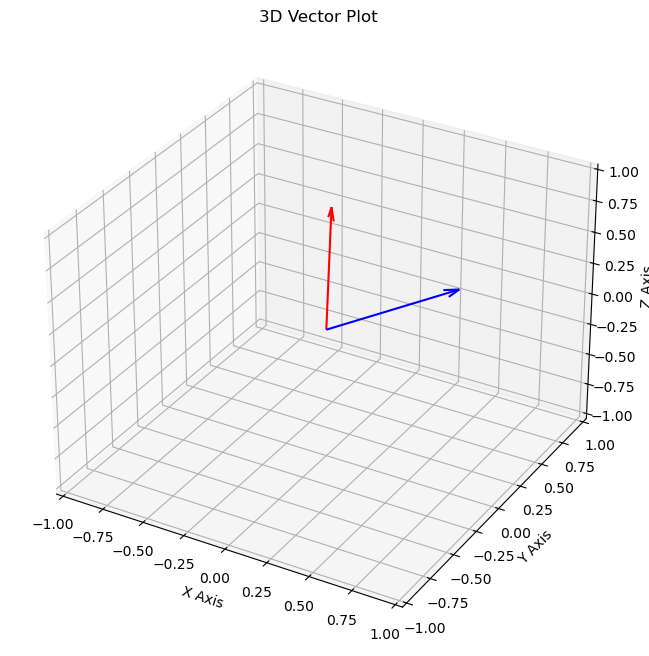

In [19]:
fig = plt.figure(figsize=[8, 8])
ax = fig.add_subplot(111, projection='3d')

ax.quiver(0, 0, 0, *datum_1, color='r', arrow_length_ratio=0.1)
ax.quiver(0, 0, 0, *datum_2, color='b', arrow_length_ratio=0.1)

# Set limits
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)

# Labels
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('3D Vector Plot')

plt.show()

## Find Orthogonal Basis

In [20]:
p = projection(datum_2, datum_1)

In [23]:
datum_1_basis = datum_1
datum_2_basis = gram_schmidt(datum_1, datum_2)

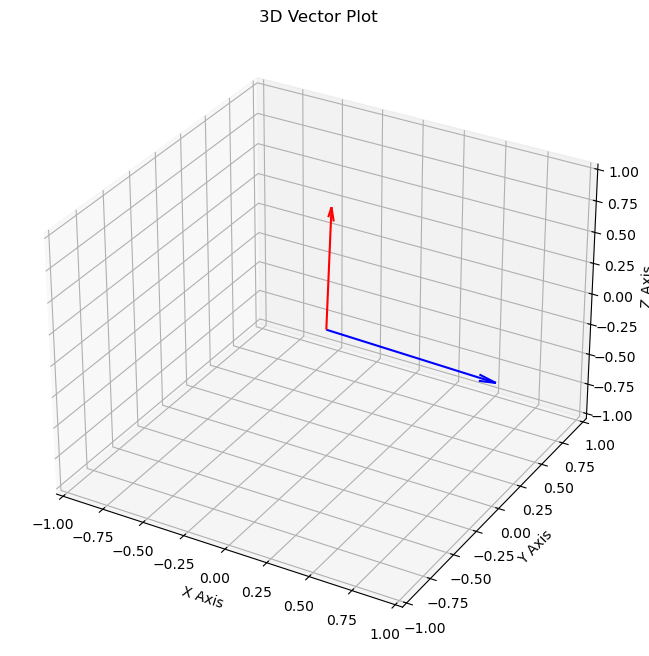

In [25]:
fig = plt.figure(figsize=[8, 8])
ax = fig.add_subplot(111, projection='3d')

ax.quiver(0, 0, 0, *datum_1_basis, color='r', arrow_length_ratio=0.1)
ax.quiver(0, 0, 0, *datum_2_basis, color='b', arrow_length_ratio=0.1)

# Set limits
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)

# Labels
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('3D Vector Plot')

plt.show()

## Find Pitch Axis

In [26]:
pitch_axis = np.cross(datum_1_basis, datum_2_basis)

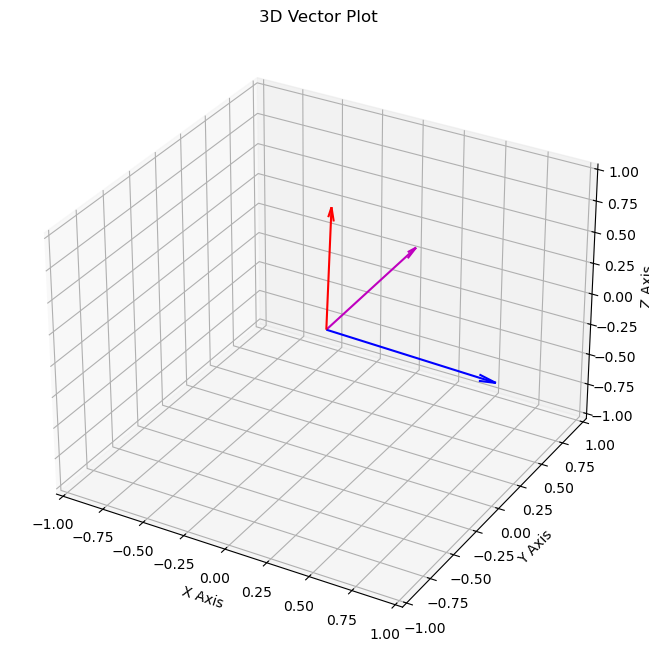

In [27]:
fig = plt.figure(figsize=[8, 8])
ax = fig.add_subplot(111, projection='3d')

ax.quiver(0, 0, 0, *datum_1_basis, color='r', arrow_length_ratio=0.1)
ax.quiver(0, 0, 0, *datum_2_basis, color='b', arrow_length_ratio=0.1)
ax.quiver(0, 0, 0, *pitch_axis, color='m', arrow_length_ratio=0.1)

# Set limits
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)

# Labels
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('3D Vector Plot')

plt.show()

## Get more data

In [37]:
vec = []
for i in tqdm(range(20)):
    entry = get_unit_vector(get_accelerometer_data())
    vec.append(entry)
    
vec = get_unit_vector(np.mean(vec, axis=0))

100%|██████████| 20/20 [00:09<00:00,  2.01it/s]


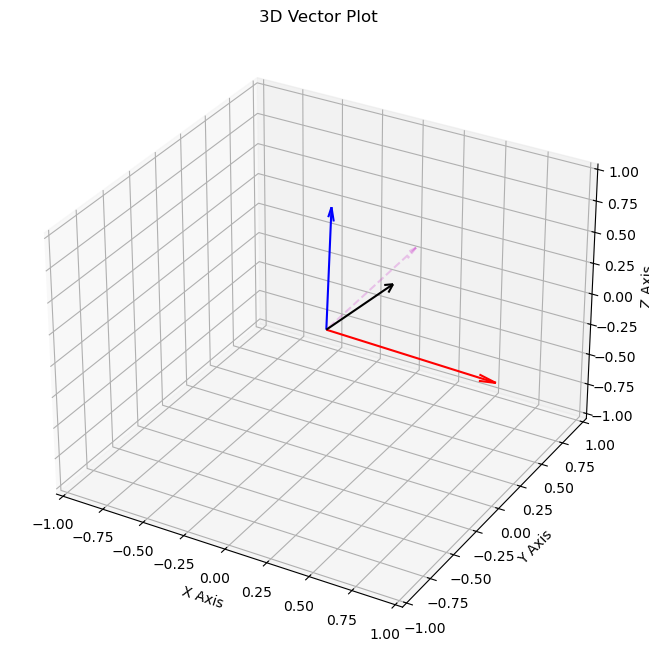

In [48]:
fig = plt.figure(figsize=[8, 8])
ax = fig.add_subplot(111, projection='3d')

ax.quiver(0, 0, 0, *datum_1_basis, color='b', arrow_length_ratio=0.1)
ax.quiver(0, 0, 0, *datum_2_basis, color='r', arrow_length_ratio=0.1)
ax.quiver(0, 0, 0, *pitch_axis, color='m', linestyle="dashed", arrow_length_ratio=0.1, alpha=0.2)

ax.quiver(0, 0, 0, *vec, color='k', arrow_length_ratio=0.1)

# Set limits
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)

# Labels
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('3D Vector Plot')

plt.show()

In [44]:
vec_angle = np.cross(datum_1_basis, vec)

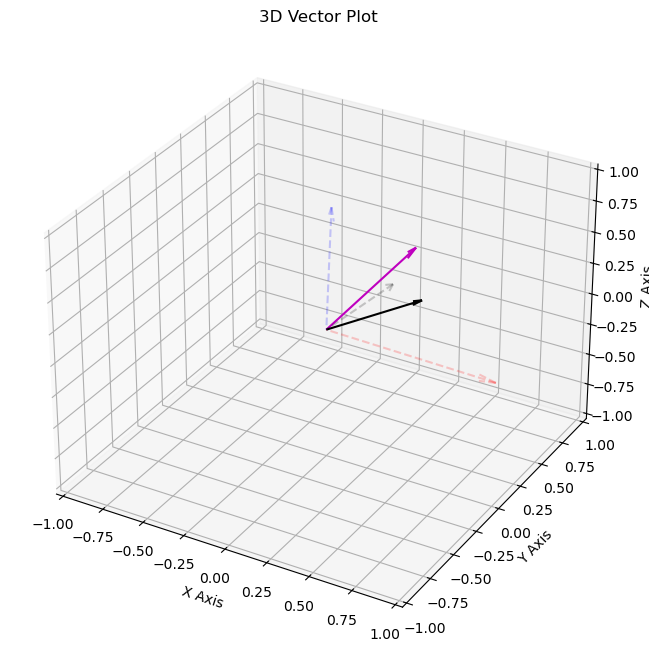

In [49]:
fig = plt.figure(figsize=[8, 8])
ax = fig.add_subplot(111, projection='3d')

ax.quiver(0, 0, 0, *datum_1_basis, color='b', linestyle="dashed", arrow_length_ratio=0.1, alpha=0.2)
ax.quiver(0, 0, 0, *datum_2_basis, color='r', linestyle="dashed", arrow_length_ratio=0.1, alpha=0.2)
ax.quiver(0, 0, 0, *pitch_axis, color='m',  arrow_length_ratio=0.1)

ax.quiver(0, 0, 0, *vec, color='k', linestyle="dashed", arrow_length_ratio=0.1, alpha=0.2)

ax.quiver(0, 0, 0, *vec_angle, color='k', arrow_length_ratio=0.1)

# Set limits
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)

# Labels
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('3D Vector Plot')

plt.show()

In [ ]:
pitch_vec = projection(vec_angle, pitch_axis)

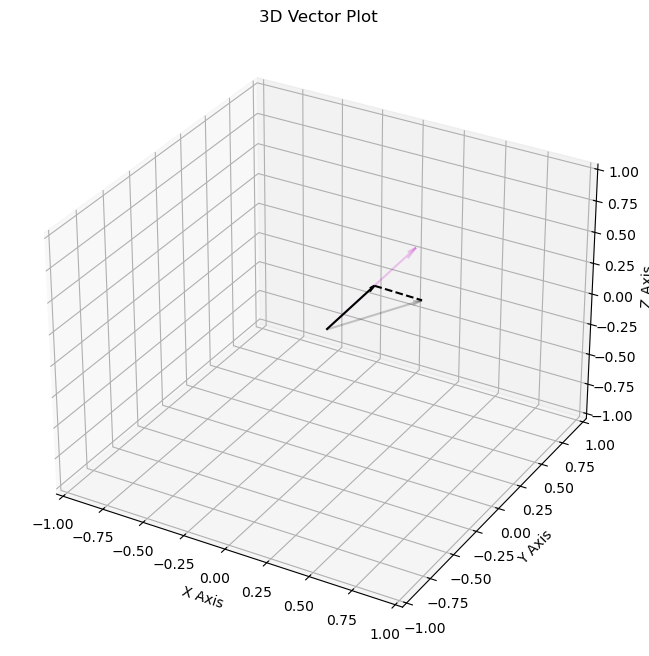

In [54]:
fig = plt.figure(figsize=[8, 8])
ax = fig.add_subplot(111, projection='3d')

ax.quiver(0, 0, 0, *pitch_axis, color='m',  arrow_length_ratio=0.1, alpha=0.2)
ax.quiver(0, 0, 0, *vec_angle, color='k', arrow_length_ratio=0.1, alpha=0.2)
ax.quiver(0, 0, 0, *pitch_vec, color='k', arrow_length_ratio=0.1)

ax.plot3D(*zip(pitch_vec, vec_angle), color="k", linestyle='dashed')

# Set limits
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)

# Labels
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('3D Vector Plot')

plt.show()

In [58]:
to_degree(np.arcsin(np.dot(pitch_vec, pitch_axis)))

31.670911232326265

In [61]:
for i in range(50):
    vec = get_unit_vector(get_accelerometer_data())
    pitch_vec = projection(np.cross(datum_1_basis, vec), pitch_axis)
    print(f"angle = {to_degree(np.arcsin(np.dot(pitch_vec, pitch_axis)))}")
    

angle = -0.4739087803311487
angle = -0.08488269734954615
angle = -0.39014000516617836
angle = -0.7288108922929747
angle = 3.7537545691830516
angle = 21.888098203195234
angle = 40.407570341331514
angle = 70.31558354896288
angle = 81.42247908908146
angle = 79.78911224727749
angle = 80.34394883982992
angle = 62.277379217392415
angle = 48.900594731694575
angle = 48.94426263513151
angle = 74.20848791611421
angle = 50.97927079093839
angle = 12.295291324181346
angle = -4.948573277531304
angle = -12.57850816752863
angle = -46.13553563387477
angle = -69.4481224587712
angle = -69.57549865296966
angle = -52.4728237522179
angle = -35.00969309075936
angle = -27.69227577531093
angle = -12.072244025961783
angle = -14.134310767187701
angle = -47.32714463298948
angle = -85.48725596494009
angle = -43.56035302723218
angle = -15.782576394942149
angle = -16.671851081485247
angle = -17.32914705498842
angle = -18.176749850452627
angle = 5.9864138443783865
angle = 65.12196432436525
angle = 67.1174643507148
an